# Importing the Necessary Libraries

In [72]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing utilities
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning models and feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
import itertools

# Evaluation metrics
from sklearn import metrics

# Model selection and cross-validation
from sklearn.model_selection import cross_val_score, train_test_split

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Loading the Dataset

In [2]:
train_path = "/content/drive/MyDrive/Dataset/Train_data.csv"
test_path = "/content/drive/MyDrive/Dataset/Test_data.csv"

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
train_df.shape

(25192, 42)

In [5]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
for col in train_df.columns:
  print(col)

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
class


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

# Data Cleaning and Preprocessing

In [15]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* here we can see that `num_outbound_cmds` is redundant column.
* it is similar to `is_host_login`
* so we are dropping the feature in both train and test dataset

In [16]:
train_df.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_df.drop(['num_outbound_cmds'], axis=1, inplace=True)

## Plotting Distribution of the Target variable

In [17]:
train_df['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


<ipython-input-20-d89ca3b1c606>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['class'].value_counts().index,


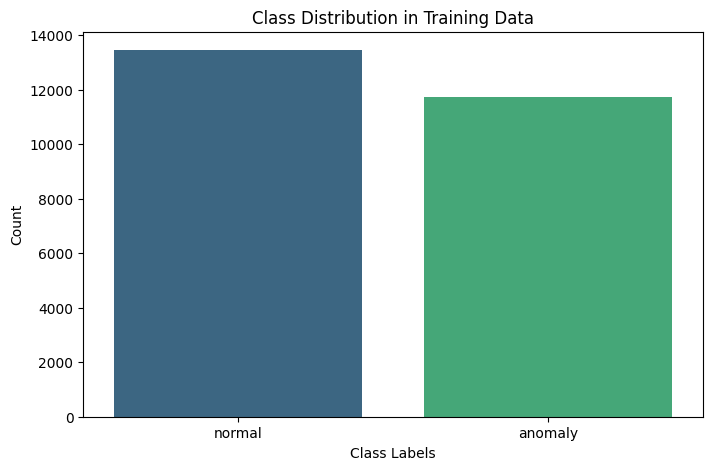

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=train_df['class'].value_counts().index,
            y=train_df['class'].value_counts().values,
            palette="viridis")

# Add labels and title
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()

## Checking and Handling Missing values

In [37]:
train_df.isna().sum().sort_values(ascending = False).head()

,0
duration,0
count,0
serror_rate,0
srv_serror_rate,0
rerror_rate,0


There are no missing values.. so we proceed to next step

## Scaling numerical col using StandardScalar()

In [22]:
scaler = StandardScaler()

In [23]:
cols = train_df.select_dtypes(include=['float64','int64']).columns

sc_train = scaler.fit_transform(train_df.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test_df.select_dtypes(include=['float64','int64']))

In [24]:
trainsc = pd.DataFrame(sc_train, columns = cols)
testsc = pd.DataFrame(sc_test, columns = cols)

## Encoding Categorical variables using LabelEncoder()

In [25]:
# Identify object-type columns
object_columns = train_df.select_dtypes(include=['object']).columns

# Print unique values for each object column
for col in object_columns:
    print(f"Unique values in '{col}': {train_df[col].unique()}")

Unique values in 'protocol_type': ['tcp' 'udp' 'icmp']
Unique values in 'service': ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
Unique values in 'flag': ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Unique values in 'class': ['normal' 'anomaly']


In [27]:
encoder = LabelEncoder()

In [28]:
# Extract categorical features from train and test sets
categorical_train = train_df.select_dtypes(include=['object']).copy()
categorical_test = test_df.select_dtypes(include=['object']).copy()

# Encode categorical features
encoded_train = categorical_train.apply(encoder.fit_transform)
encoded_test = categorical_test.apply(encoder.fit_transform)

In [31]:
# Separate target column from encoded data
encoded_train_features = encoded_train.drop(columns=['class'])  # Feature set
encoded_train_target = encoded_train[['class']].copy()          # Target variable

## Splitting the Train DataFrame to X_train, y_train

In [60]:
X_train = pd.concat([trainsc,encoded_train_features],axis=1)
y_train = encoded_train_target.iloc[:, 0]
X_train.shape
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.624317,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,0.490836,-0.373886,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,0.334947,-0.299430,1.595477,1.600209,-0.372186,-0.373098,-1.388806,0.042773,-0.373886,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.694082,-0.313230,-0.193018,-0.187141,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.476067,0.059355,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.023115,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9


## Concatinating the scaled and encoded features in Test DataFrame

In [59]:
test_df = pd.concat([testsc,encoded_test],axis=1)
test_df.shape
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2


# Feature Selection

I used Random Forest for feature selection because it provides reliable feature importance scores by measuring how much each feature contributes to decision splits, helping identify the most relevant attributes for classification.

In [47]:
rfc = RandomForestClassifier();

rfc.fit(X_train, y_train);

In [48]:
# Get feature importance scores from the RandomForestClassifier
score = np.round(rfc.feature_importances_, 3)

# Create a DataFrame to store features and their importance scores
importances = pd.DataFrame({'feature': X_train.columns, 'importance': score})

# Sort the features by importance in descending order and set 'feature' as the index
importances = importances.sort_values('importance', ascending=False).set_index('feature')

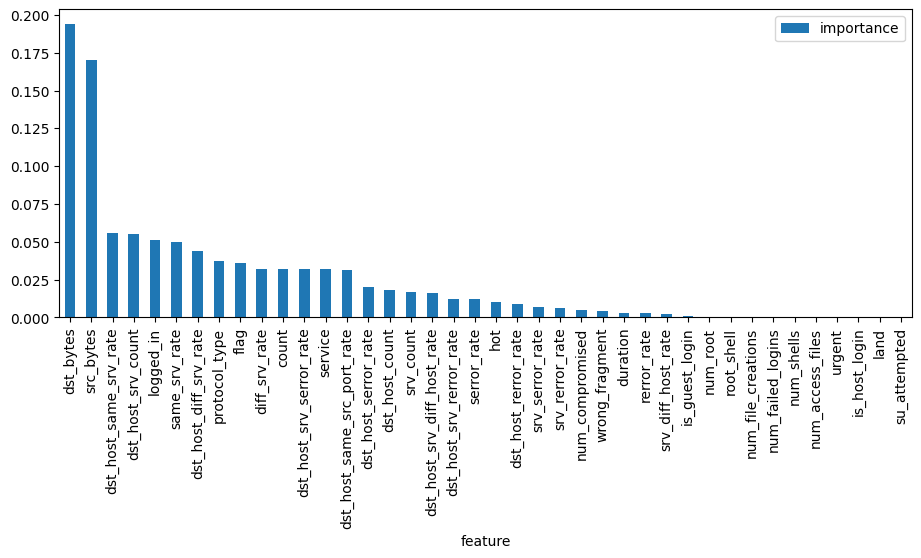

In [49]:
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [50]:
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [52]:
# Create a list of tuples containing the RFE support (True/False) and corresponding feature names
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]

# Filter the feature names where the RFE support is True (selected features)
selected_features = [v for i, v in feature_map if i == True]

# Display the selected features
selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'protocol_type',
 'service',
 'flag']

These are the features that are selected

# Model Selection, Training and Evaluation

* I have chosen 3 models to train:

  1.   Random Forest Classifier
  2.   KNeighborsClassifier
  3.   SVC

  Based on the Evaluation metrics like ROC, accuracy, precision, recall, and F1-score, i choose the best fitted model.



In [62]:
x_train, x_test, y_Train, y_Test = train_test_split(X_train,y_train,train_size=0.70, random_state=2)

In [63]:
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC()
}

In [64]:
model_results = {}

for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(x_train, y_Train)  # Ensure x_train and y_Train are defined in your environment

    # Make predictions on the test set (replace x_test and y_Test with actual test data)
    y_pred = model.predict(x_test)  # Using x_test for prediction

    # Perform cross-validation and calculate mean ROC-AUC score using the training set
    cv_scores = cross_val_score(model, x_train, y_Train, cv=10, scoring='roc_auc')

    # Evaluate the model using the test set
    accuracy = metrics.accuracy_score(y_Test, y_pred)  # Evaluating on the test set
    precision = metrics.precision_score(y_Test, y_pred, average='weighted', zero_division=0)
    recall = metrics.recall_score(y_Test, y_pred, average='weighted', zero_division=0)
    f1 = metrics.f1_score(y_Test, y_pred, average='weighted', zero_division=0)
    confusion_matrix = metrics.confusion_matrix(y_Test, y_pred)
    classification_report = metrics.classification_report(y_Test, y_pred)

    # Store results for the current model
    model_results[model_name] = {
        "model": model,
        "cv_mean_roc_auc": cv_scores.mean(),
        "cv_scores": cv_scores,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": confusion_matrix,
        "classification_report": classification_report
    }

In [73]:
for model_name, result in model_results.items():
    print(f"Model: {model_name}")
    print()
    print(f"Mean ROC-AUC: {result['cv_mean_roc_auc']}")
    print()
    print(f"Cross-validation scores: {result['cv_scores']}")
    print()
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1-Score: {result['f1_score']}")
    print()
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print()
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 40)

Model: RandomForestClassifier

Mean ROC-AUC: 0.9999534386047791

Cross-validation scores: [0.99998774 0.99996321 0.99996321 0.99983283 0.99999871 0.99999806
 0.99996381 0.99997286 0.99988304 0.99997092]

Accuracy: 0.9969568668960043
Precision: 0.9969570012076766
Recall: 0.9969568668960043
F1-Score: 0.9969567760908147

Confusion Matrix:
[[3485   13]
 [  10 4050]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

----------------------------------------
Model: KNeighborsClassifier

Mean ROC-AUC: 0.9972554645008419

Cross-validation scores: [0.99923387 0.99857553 0.99562913 0.99805531 0.99514441 0.99869465
 0.99632174 0.99645874 0.99744616 0.9969951 ]

Accuracy: 0.9916644614977508
Precision: 0

Random Forest Classifier is the Best fitted model compared to others

# Predicting for Testing Dataset

In [66]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
model.predict(test_df)

array([0, 0, 1, ..., 1, 1, 0])